In [1]:
%matplotlib ipympl
from matplotlib import pyplot as plt
from scipy.optimize import curve_fit
import numpy as np

In [2]:
def func(t, a, t_d, t_r):
    return a * (np.exp(- t / t_d) - np.exp(- t / t_r))

## Data Generation

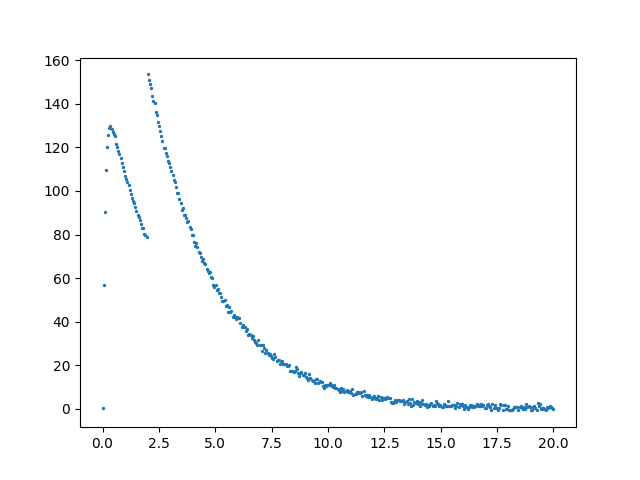

In [3]:
xdata = np.linspace(0, 20, 400)
y = func(xdata, 300, 3, 0.1)
rng = np.random.default_rng()
y_noise = 0.8 * rng.normal(size=xdata.size)
ydata = y + y_noise
ydata[xdata < 2] *= 0.5
plt.figure()
plt.scatter(xdata, ydata, s=2, label='data')
plt.show()

## Curve Fit
3 variations:
1. No sigma: Fit the curve to all points equally
2. sigma1: Fit the curve more accurately to points in x>2
3. sigma2: Fit the curve more accurately to points in x<2

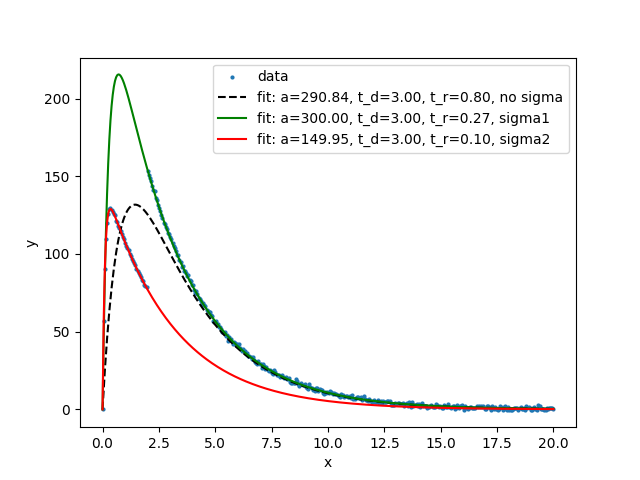

In [4]:
sigma1 = np.ones_like(xdata)
sigma2 = np.ones_like(xdata)
sigma1[xdata>2]=0.001
sigma2[xdata<2]=0.001
popt0, pcov0 = curve_fit(func, xdata, ydata, bounds=([0,0,0], [300,3,3]))
popt1, pcov1 = curve_fit(func, xdata, ydata, sigma=sigma1, bounds=([0,0,0], [300,3,3]))
popt2, pcov2 = curve_fit(func, xdata, ydata, sigma=sigma2, bounds=([0,0,0], [300,3,3]))
plt.figure()
plt.scatter(xdata, ydata, s=4, label='data')
plt.plot(xdata, func(xdata, *popt0), 'k--',
         label='fit: a=%.2f, t_d=%.2f, t_r=%.2f, no sigma' % tuple(popt0))
plt.plot(xdata, func(xdata, *popt1), 'g-',
         label='fit: a=%.2f, t_d=%.2f, t_r=%.2f, sigma1' % tuple(popt1))
plt.plot(xdata, func(xdata, *popt2), 'r-',
         label='fit: a=%.2f, t_d=%.2f, t_r=%.2f, sigma2' % tuple(popt2))
plt.xlabel('x')
plt.ylabel('y')
plt.legend()
plt.show()